# **Marketing Campaign for Banking Products**

In [98]:
from google.colab import files
upl = files.upload()

Saving Bank_Personal_Loan_Modelling.xlsx to Bank_Personal_Loan_Modelling (1).xlsx


# **Data Description:**
##The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan).

# **Objective:**
## The classification goal is to predict the likelihood of a liability customer buying personal loans.


In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Attribute Information:**

● ID: Customer ID

● Age: Customer's age in completed years

● Experience: #years of professional experience

● Income: Annual income of the customer ($000)

● ZIP Code: Home Address ZIP code.

● Family: Family size of the customer

● CCAvg: Avg. spending on credit cards per month ($000)

● Education: Education Level. 1: Undergrad; 2: Graduate; 3:
Advanced/Professional

● Mortgage: Value of house mortgage if any. ($000)

● Personal Loan: Did this customer accept the personal loan offered in the last
campaign?

● Securities Account: Does the customer have a securities account with the bank?

● CD Account: Does the customer have a certificate of deposit (CD) account with
the bank?

● Online: Does the customer use internet banking facilities?

● Credit card: Does the customer use a credit card issued by the bank?

# 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values etc








In [100]:
# load dataset
df = pd.read_excel('/content/Bank_Personal_Loan_Modelling.xlsx', sheet_name=1)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [101]:
# shape of dataset
df.shape

(5000, 14)

In [102]:
# statistical summary
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [103]:
# information of dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [104]:
# check null values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# 2. Check if you need to clean the data for any of the variables

In [105]:
# Experience column having 52 negative values which will affect model, so there are two option -->
# 1. put median of column in negative values
# 2. drop experience column

df[df['Experience'] < 0]['Experience'].count()

52

In [106]:
# 1. put median in place of negative values
df.loc[(df['Experience'] < 0), 'Experience'] = np.nan
df['Experience'].fillna(df.Experience.median())

0        1.0
1       19.0
2       15.0
3        9.0
4        8.0
        ... 
4995     3.0
4996     4.0
4997    39.0
4998    40.0
4999     4.0
Name: Experience, Length: 5000, dtype: float64

In [107]:
# here in dataset ID column is not useless because it is not depends on any field in dataset
df.drop('ID', axis=1, inplace=True)

In [108]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,4948.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.331043,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.311973,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.750000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# 3. EDA: Study the data distribution in each attribute and target variable, share your findings.

● Number of unique in each column?

● Number of people with zero mortgage?

● Number of people with zero credit card spending per month?

● Value counts of all categorical columns.

● Univariate and Bivariate analysis


In [109]:
# unique values in each column
df.nunique()

Age                    45
Experience             44
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [110]:
# Number of people with zero mortgage?
df[df['Mortgage'] == 0]['Mortgage'].count()

3462

In [111]:
#  Number of people with zero credit card spending per month?
df[df['CCAvg'] == 0]['CCAvg'].count()

106

In [112]:
# count values for Education column
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [113]:
# count values for Family column
df['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [114]:
# count values for Personal loan column
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [115]:
# count values for Securities Account column
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [116]:
# count values for Online column
df['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [117]:
# count values for CD Account column
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [118]:
# count values for Credit Card Column
df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

## **Univariate Analysis**

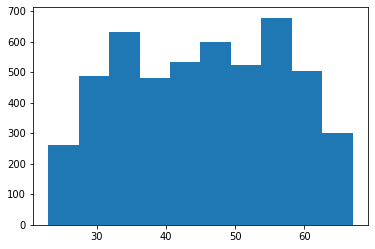

In [119]:
plt.hist(df['Age'])
plt.show()

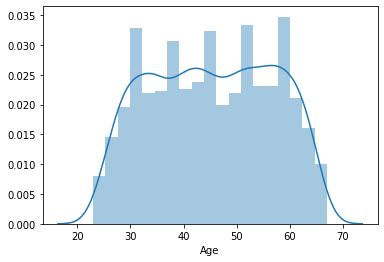

In [120]:
# analysis of age shows normal distribution
sns.distplot(df['Age'])  # distplot is combination of histogram and kde

Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median

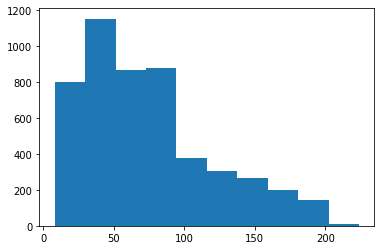

In [121]:
plt.hist(df['Income'])
plt.show()

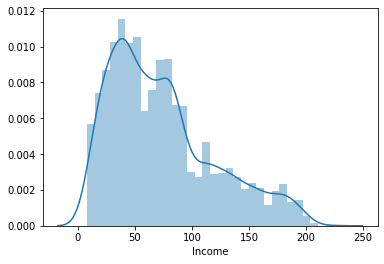

In [122]:
# it shows skewed toward right 
sns.distplot(df['Income'])

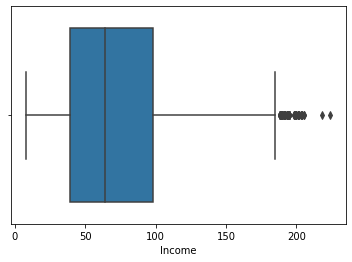

In [123]:
# from below figure its clear that income column is having outliers which needs to transform
sns.boxplot(df['Income'])

Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median

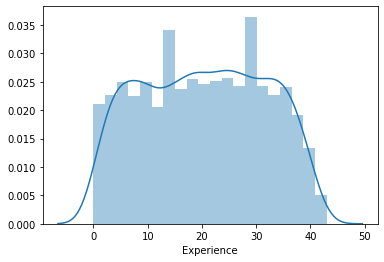

In [124]:
sns.distplot(df['Experience'])

Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. This could be a faulty values as in general it is not possible to measure negative years of experience.

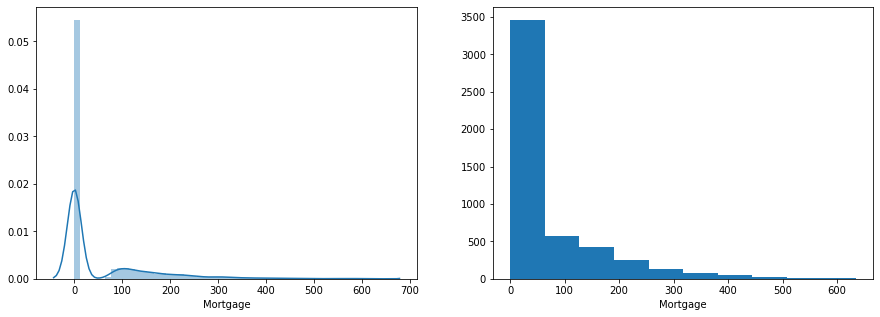

In [125]:
# mortgage is highly skewed

fig = plt.figure(figsize=(15,5)) 
plt.subplot(121)
sns.distplot(df['Mortgage'])
plt.subplot(122)
plt.hist(df['Mortgage'])
plt.xlabel('Mortgage')
plt.show()

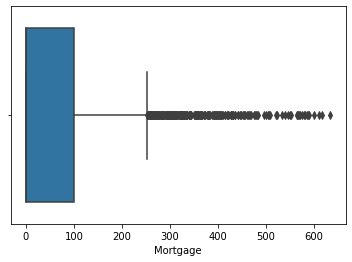

In [126]:
sns.boxplot(df['Mortgage'])

Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K

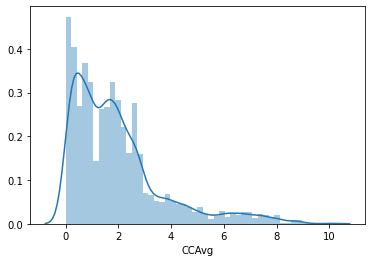

In [127]:
# graph is right skewed
sns.distplot(df['CCAvg'])

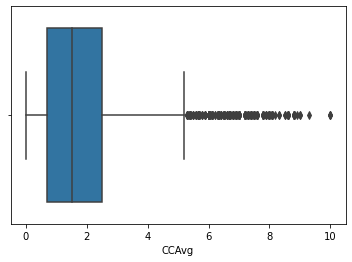

In [128]:
# from below figure its clear that CCAvg column is having outliers which needs to transform
sns.boxplot(df['CCAvg'])

CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K

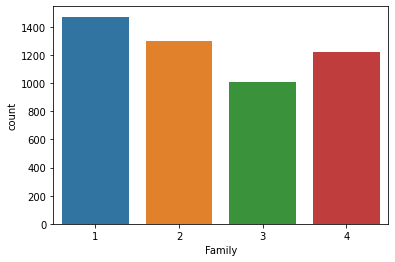

In [129]:
# The variables family and education are ordinal variables. The distribution of families is evenly distributes
sns.countplot(x=df['Family'])

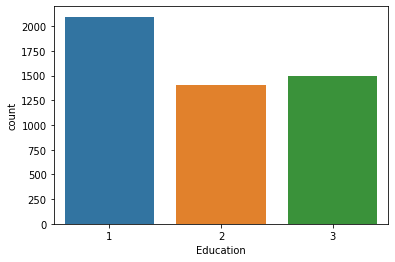

In [130]:
sns.countplot(df['Education'])

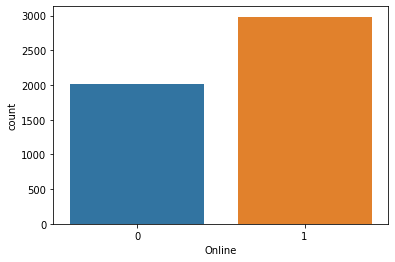

In [131]:
sns.countplot(df['Online'])

## **Bivariate Analysis**

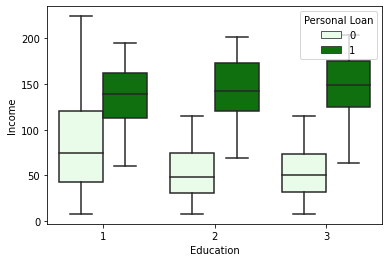

In [132]:
# from this observation came to know that personal loan is granted to person having more income
sns.boxplot(y=df['Income'], x=df['Education'], hue=df['Personal Loan'], color='green')

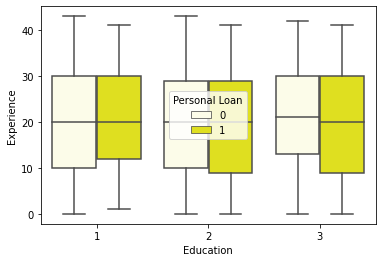

In [133]:
# Experience is not much affect the personal loan
sns.boxplot(x='Education', y='Experience', hue='Personal Loan', data=df, color='yellow')

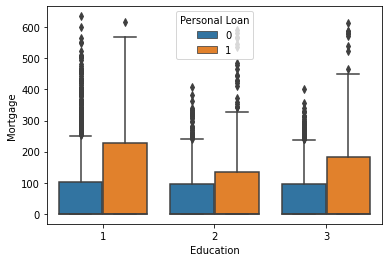

In [134]:
# below observation shows a person have high mortgage have personal loan
sns.boxplot(x='Education', y='Mortgage', hue='Personal Loan', data=df)

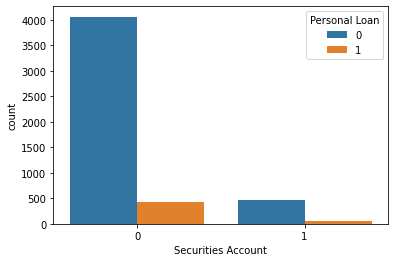

In [135]:
# below observation shows a person have high security account those does not have personal loan
sns.countplot(x=df['Securities Account'], hue=df['Personal Loan'])

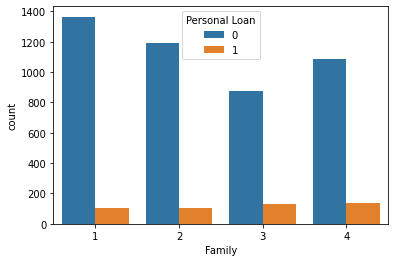

In [136]:
# from below observation family size not affect the personal loan
sns.countplot(x=df['Family'], hue=df['Personal Loan'])

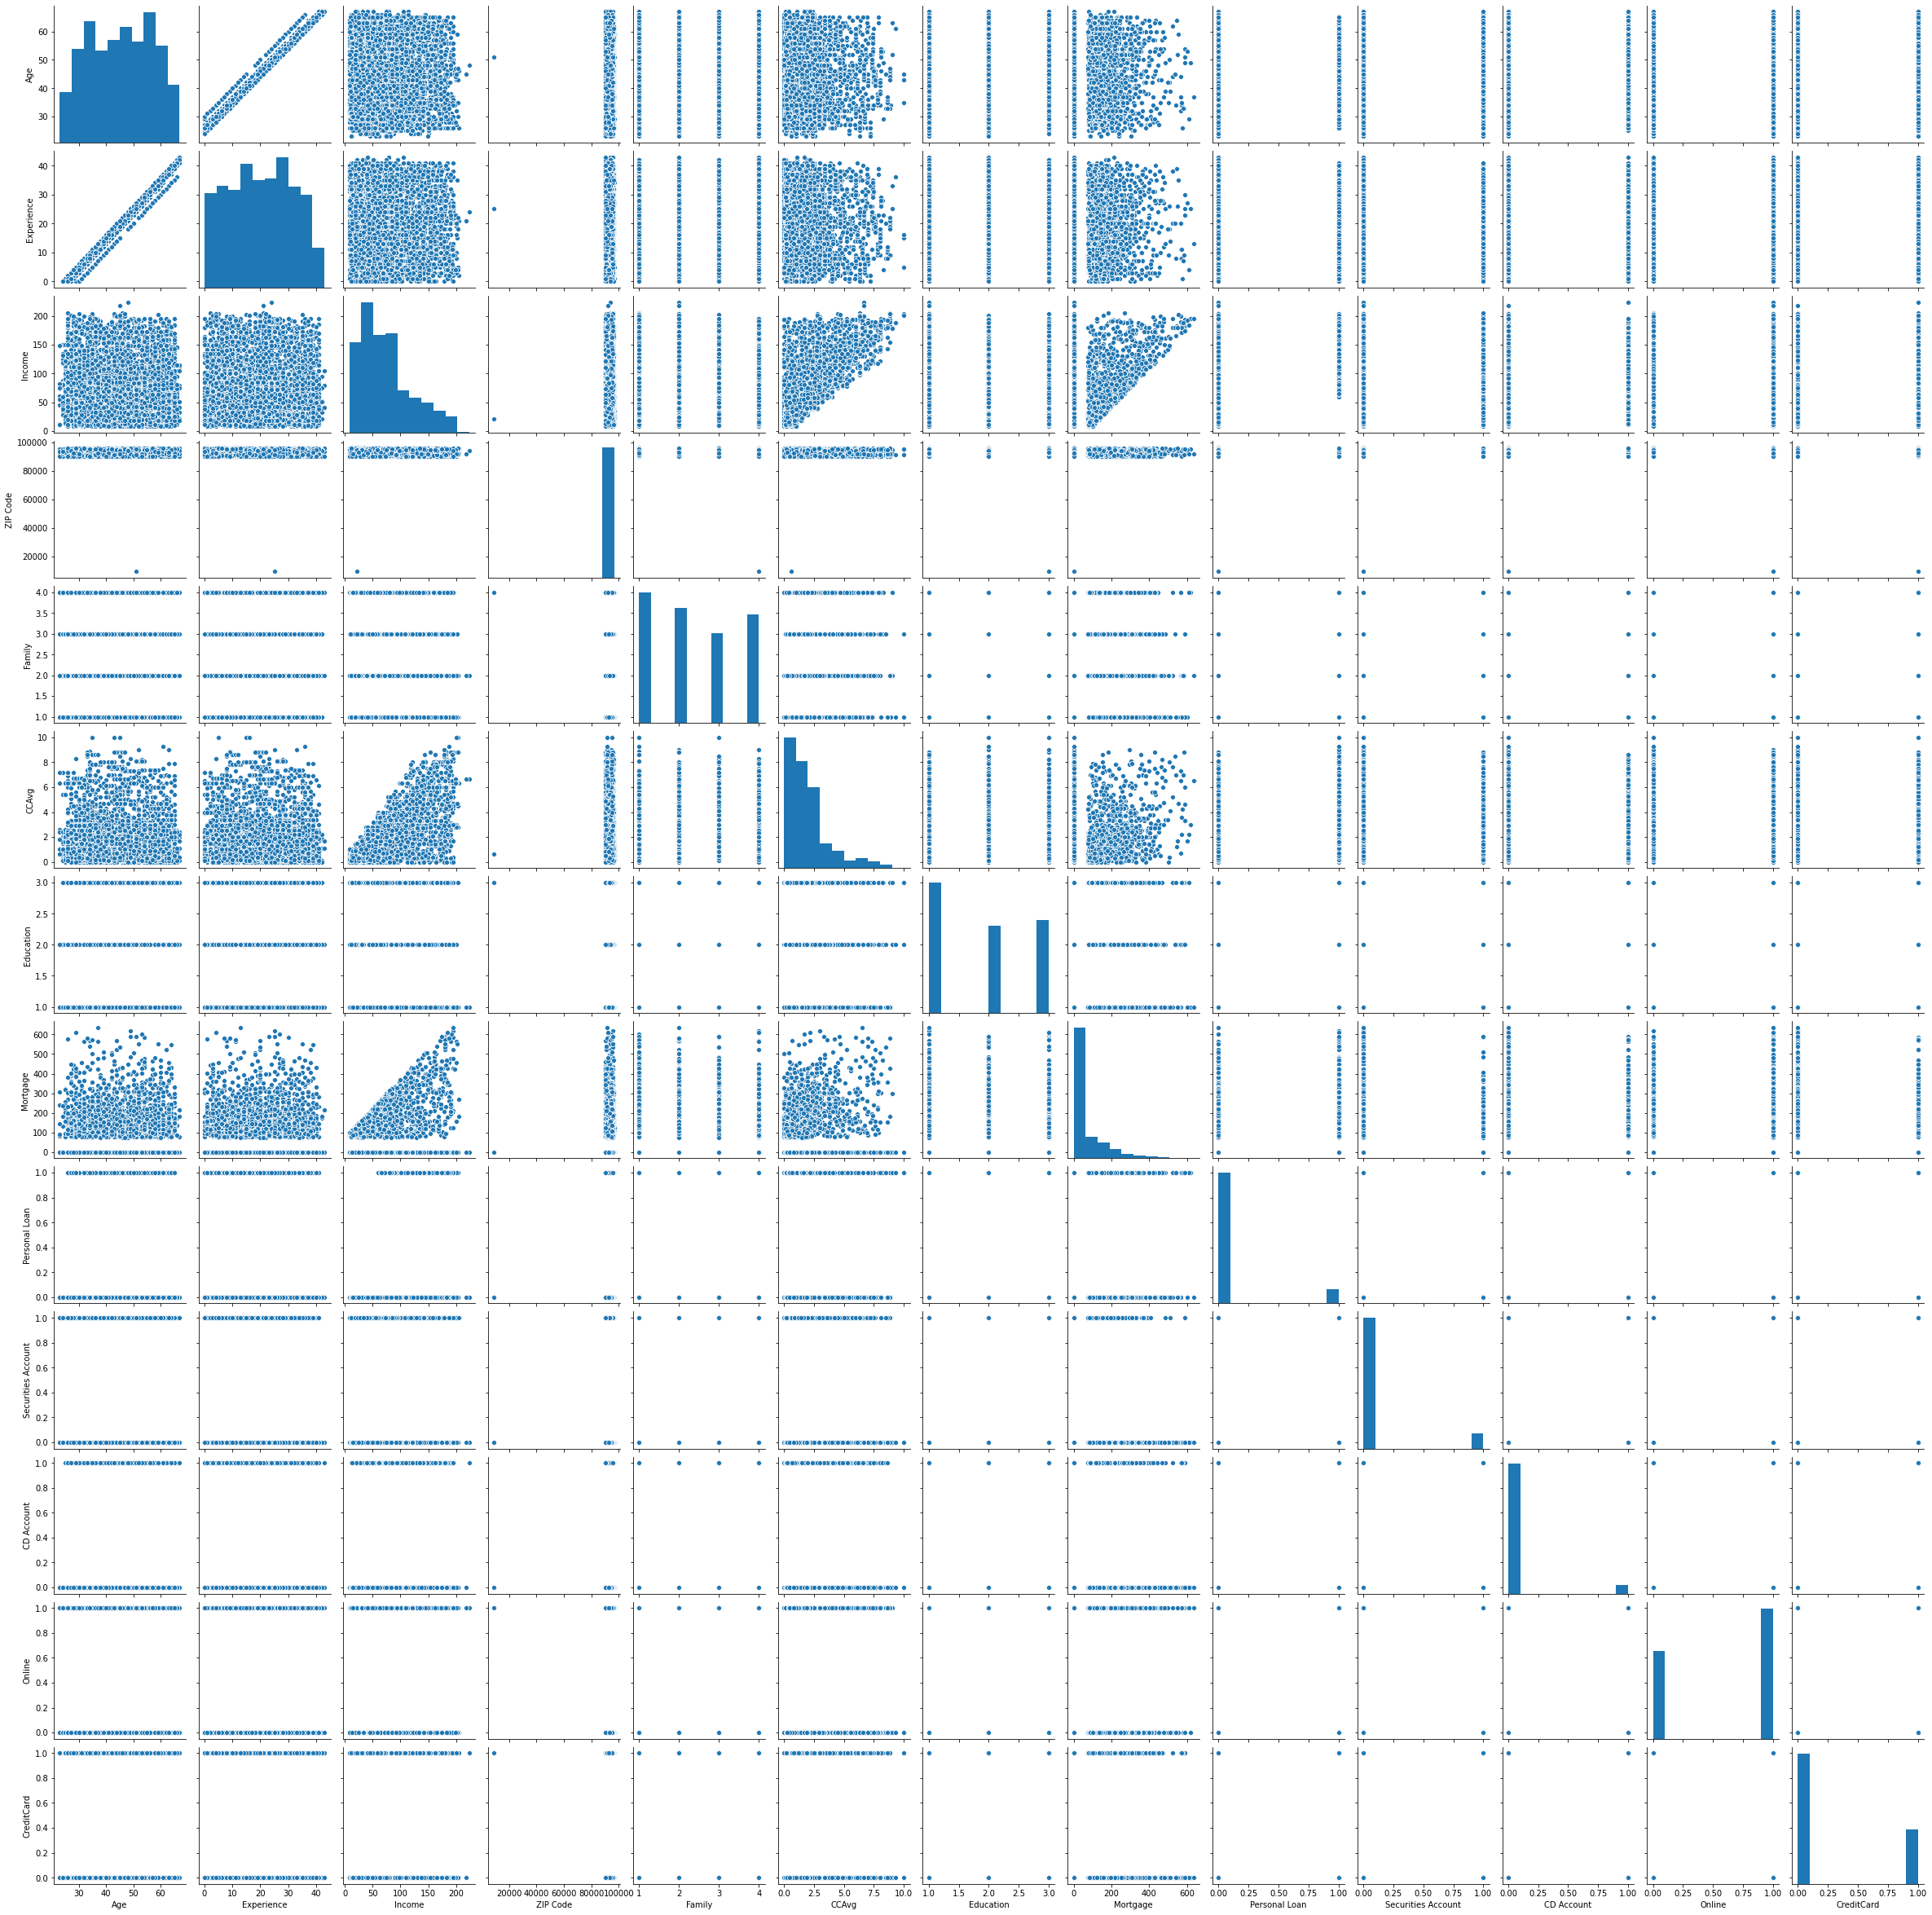

In [137]:
sns.pairplot(df)

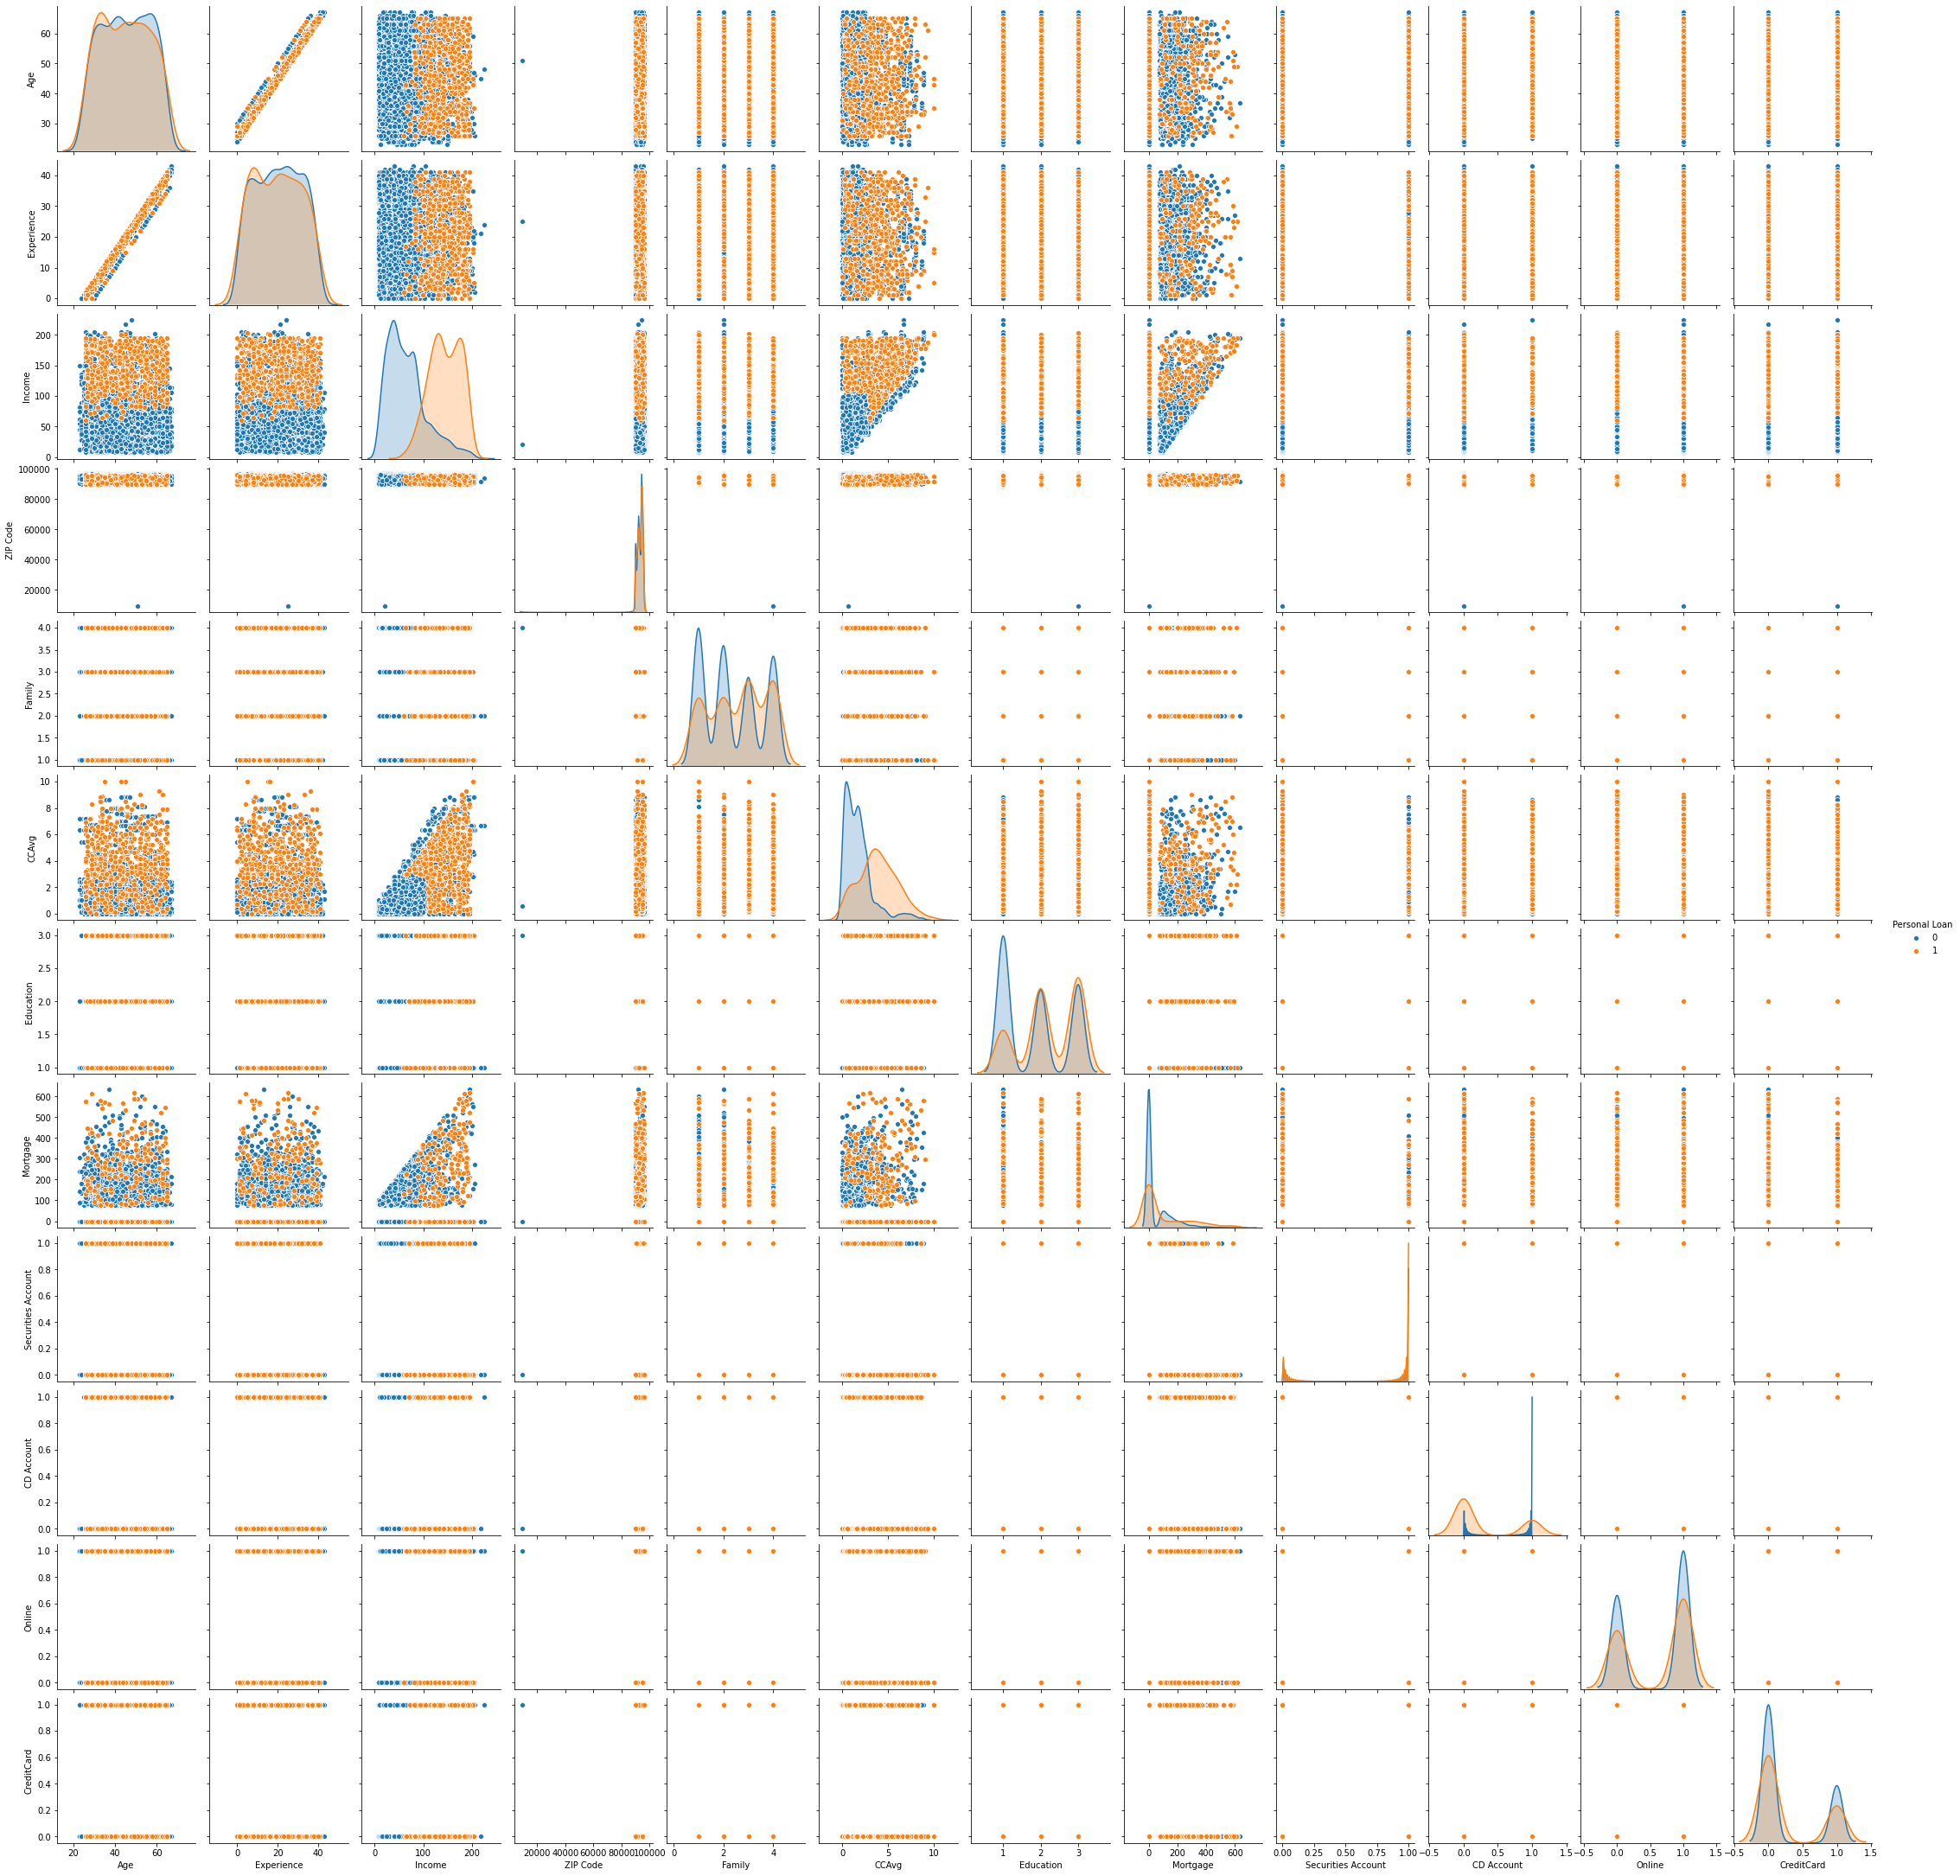

In [138]:
sns.pairplot(df, hue='Personal Loan')

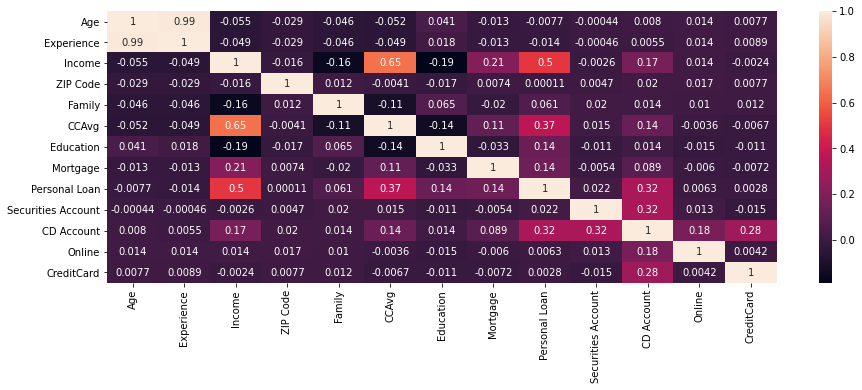

In [139]:
fig = plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot=True)

From above heatmap it shows that Age and Experience are highly correlated, so it better to drop experience column 

In [140]:
df = df.drop('Experience', axis=1, )

In [141]:
df.describe()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# 4. Apply necessary transformations for the feature variables

feature variables such as Income, CCAvg and Mortgage are skewed data these need transformation to narmalized

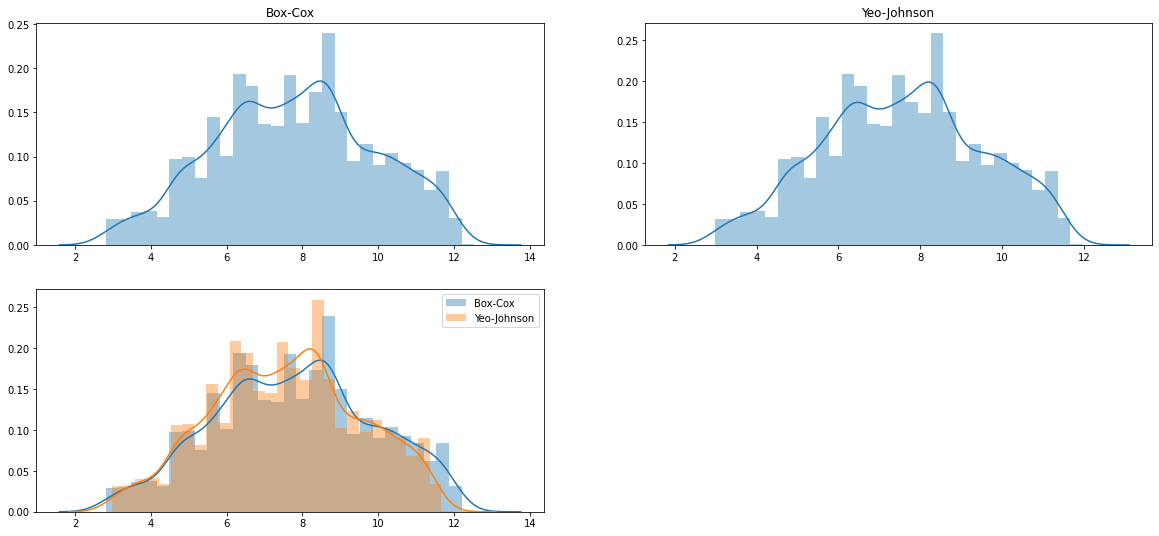

In [142]:
from sklearn.preprocessing import PowerTransformer

powerTransf = PowerTransformer(method='box-cox', standardize=False)
powerTransf.fit(df['Income'].values.reshape(-1,1))
trans = powerTransf.transform(df['Income'].values.reshape(-1,1))

powerTransf1 = PowerTransformer(method='yeo-johnson', standardize=False)
powerTransf1.fit(df['Income'].values.reshape(-1,1))
trans1 = powerTransf1.transform(df['Income'].values.reshape(-1,1))

fig = plt.figure(figsize=(20,9))
plt.subplot(2,2,1)
plt.title('Box-Cox')
sns.distplot(trans)

plt.subplot(2,2,2)
plt.title('Yeo-Johnson')
sns.distplot(trans1)

plt.subplot(2,2,3)
sns.distplot(trans, label='Box-Cox')
sns.distplot(trans1, label='Yeo-Johnson')
plt.legend()
plt.show()

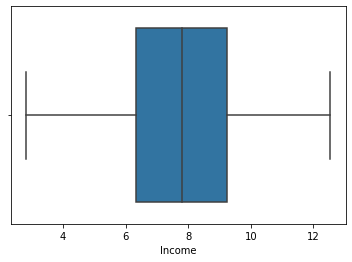

In [143]:
# After Power Transformation there is no outliers and is now normal
df['Income'] = pd.Series(trans.flatten())
sns.boxplot(df['Income'])

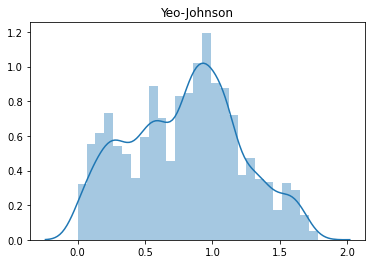

In [144]:
# Transformation on CCAvg column -->
powerTransf1 = PowerTransformer(method='yeo-johnson', standardize=False)
powerTransf1.fit(df['CCAvg'].values.reshape(-1,1))
trans1 = powerTransf1.transform(df['CCAvg'].values.reshape(-1,1))
plt.title('Yeo-Johnson')
sns.distplot(trans1)


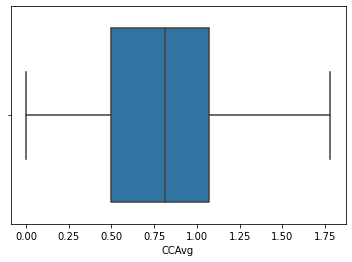

In [145]:
# After Power Transformation there is no outliers and is now normal
df['CCAvg'] = pd.Series(trans1.flatten())
sns.boxplot(df['CCAvg'])

In [146]:
df['Mortgage_'] = pd.cut(df['Mortgage'], bins=[0, 100, 200, 300, 400, 500, 600, 700], labels=[0, 1, 2, 3, 4, 5, 6], include_lowest=True)

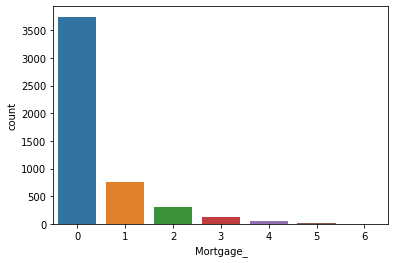

In [147]:
df['Mortgage_'].value_counts()
# df.drop('Mortgage', axis=1, inplace=True)
sns.countplot(df.Mortgage_)

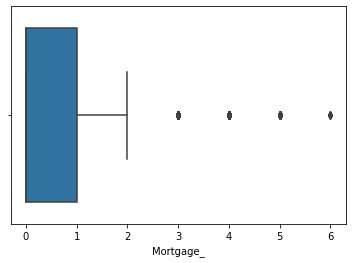

In [148]:
sns.boxplot(df['Mortgage_'])

In [149]:
from scipy.stats import zscore
df['Mortgage_zscore'] = np.abs(zscore(df['Mortgage']))
df = df[df['Mortgage_zscore']<3]
df.drop(['Mortgage_zscore', 'Mortgage_', 'ZIP Code'], axis=1, inplace=True)

# 5. Normalise your data and split the data into training and test set in the ratio of 70:30 respectively

In [150]:
from sklearn.model_selection import train_test_split
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

X = X.values
y = y.values

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [152]:
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

print("inputs Traning data : ", X_train.shape)
print("inputs Testing data : ", X_test.shape)
print("Target Traning data : ", y_train.shape)
print("Target Testing data : ", y_test.shape)

inputs Traning data :  (3426, 10)
inputs Testing data :  (1469, 10)
Target Traning data :  (3426, 1)
Target Testing data :  (1469, 1)


In [153]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# 6. Use the Logistic Regression model to predict the likelihood of a customer buying personal loans.


In [154]:
logres = LogisticRegression(random_state=0)
logres.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [155]:
# Finding Accurancy -- >
y_pred = logres.predict(X_test)
pred_train_X = logres.predict(X_train)
pred_test_X = logres.predict(X_test)
print("Accuracy : ", accuracy_score(y_pred, y_test))
print("Accuracy of Training Data : ", accuracy_score(pred_train_X, y_train))
print("Accuracy of Testing Data : ", accuracy_score(pred_test_X, y_test))

Accuracy :  0.9428182437031994
Accuracy of Training Data :  0.9512551079976649
Accuracy of Testing Data :  0.9428182437031994


              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1383
           1       0.51      0.77      0.61        86

    accuracy                           0.94      1469
   macro avg       0.75      0.86      0.79      1469
weighted avg       0.96      0.94      0.95      1469

[[1319   20]
 [  64   66]]


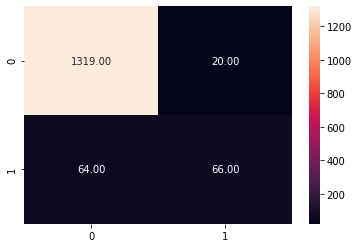

In [156]:
# Finding Confusion Matrix -->
print(classification_report(y_pred, y_test))
Confusion_Mat = confusion_matrix(y_test, pred_test_X.reshape(-1,1))
print(Confusion_Mat)

sns.heatmap(Confusion_Mat, annot=True, fmt='.2f')


true positives (TP): These are cases in which we predicted yes, and actually took loan.

TP = 66

true negatives (TN): We predicted no, and they actually did not took loan.

TN = 1319

false positives (FP): We predicted yes, but they don't actually took loan.(Also 
known as a "Type I error.")

FP = 20

false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")

FN = 64

We must concentrate upon or reduce type II error here since we are interested in the customers who had actually bought personal loans, but our model predicted them to be a non-buyer.

In [157]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# 7. Print all the metrics related for evaluating the model performance


Accuracy 0.955071477195371
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1359
           1       0.67      0.79      0.72       110

    accuracy                           0.96      1469
   macro avg       0.83      0.88      0.85      1469
weighted avg       0.96      0.96      0.96      1469

[[1316   23]
 [  43   87]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


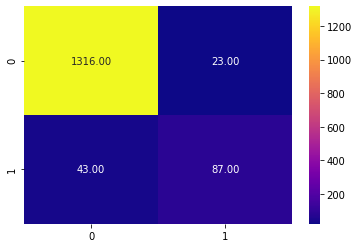

In [158]:
logres.fit(X_train_scaled, y_train)
y_pred = logres.predict(X_test_scaled)
print("Accuracy", accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))
Confusion_Mat = confusion_matrix(y_test, y_pred)
print(Confusion_Mat)

sns.heatmap(Confusion_Mat, annot=True, fmt='.2f', cmap='plasma')

true positives (TP): These are cases in which we predicted yes, and actually took loan.

TP = 87

true negatives (TN): We predicted no, and they actually did not took loan.

TN = 1316

false positives (FP): We predicted yes, but they don't actually took loan.(Also 
known as a "Type I error.")

FP = 23

false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")

FN = 43

# 8. Build various other classification algorithms and compare their performance

# Decision Tree

In [159]:
DTC = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=5)
DTC.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [160]:
pred_train_X1 = DTC.predict(X_train)
pred_test_X1 = DTC.predict(X_test)
print("Accuracy of Training Data : ", accuracy_score(pred_train_X1, y_train))
print("Accuracy of Testing Data : ", accuracy_score(pred_test_X1, y_test))

Accuracy of Training Data :  0.9868651488616462
Accuracy of Testing Data :  0.9857045609257998


[[1332    7]
 [  14  116]]


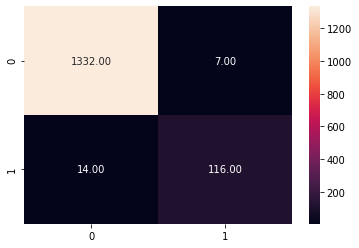

In [161]:
# Finding Confusion Matrix -->
Confusion_Mat = confusion_matrix(y_test, pred_test_X1.reshape(-1,1))
print(Confusion_Mat)

sns.heatmap(Confusion_Mat, annot=True, fmt='.2f')

Accuracy 0.9870660313138189
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1344
           1       0.91      0.94      0.93       125

    accuracy                           0.99      1469
   macro avg       0.95      0.97      0.96      1469
weighted avg       0.99      0.99      0.99      1469

[[1332    7]
 [  12  118]]


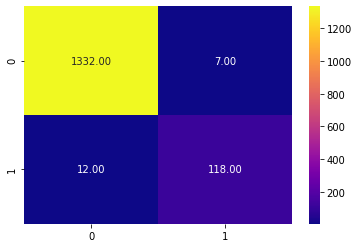

In [162]:
DTC.fit(X_train_scaled, y_train)
y_pred1 = DTC.predict(X_test_scaled)
print("Accuracy", accuracy_score(y_pred1, y_test))
print(classification_report(y_pred1, y_test))
Confusion_Mat = confusion_matrix(y_test, y_pred1)
print(Confusion_Mat)

sns.heatmap(Confusion_Mat, annot=True, fmt='.2f', cmap='plasma')

[Text(366.1875, 498.3, 'X[1] <= 0.674\nentropy = 0.431\nsamples = 3426\nvalue = [3123, 303]'),
 Text(139.5, 407.70000000000005, 'X[3] <= 0.897\nentropy = 0.068\nsamples = 2585\nvalue = [2564, 21]'),
 Text(104.625, 317.1, 'entropy = 0.0\nsamples = 2460\nvalue = [2460, 0]'),
 Text(174.375, 317.1, 'X[7] <= 1.829\nentropy = 0.653\nsamples = 125\nvalue = [104, 21]'),
 Text(104.625, 226.5, 'X[3] <= 1.202\nentropy = 0.528\nsamples = 117\nvalue = [103, 14]'),
 Text(69.75, 135.89999999999998, 'X[0] <= -0.783\nentropy = 0.7\nsamples = 74\nvalue = [60, 14]'),
 Text(34.875, 45.299999999999955, 'entropy = 0.985\nsamples = 14\nvalue = [8, 6]'),
 Text(104.625, 45.299999999999955, 'entropy = 0.567\nsamples = 60\nvalue = [52, 8]'),
 Text(139.5, 135.89999999999998, 'entropy = 0.0\nsamples = 43\nvalue = [43, 0]'),
 Text(244.125, 226.5, 'X[1] <= 0.656\nentropy = 0.544\nsamples = 8\nvalue = [1, 7]'),
 Text(209.25, 135.89999999999998, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(279.0, 135.899999999

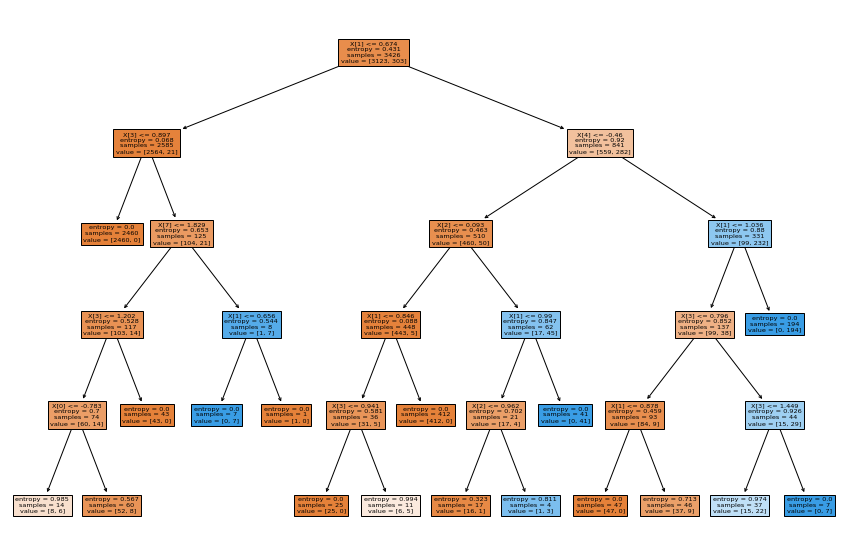

In [163]:
from sklearn import tree
fig = plt.figure(figsize=(15,10))
tree.plot_tree(DTC, filled=True)

In Desicion Tree Classifer false negative is not changed after standardized the data. It means standardization is not work in DecisiontreeClassifier model

# Random Forest Classifier

In [164]:
ranFC = RandomForestClassifier(random_state=0, max_depth=5, n_estimators=400)
ranFC.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [165]:
pred_train_X2 = ranFC.predict(X_train)
pred_test_X2 = ranFC.predict(X_test)
print("Accuracy of Training Data : ", accuracy_score(pred_train_X2, y_train))
print("Accuracy of Testing Data : ", accuracy_score(pred_test_X2, y_test))

Accuracy of Training Data :  0.9862813776999416
Accuracy of Testing Data :  0.9836623553437712


[[1339    0]
 [  24  106]]


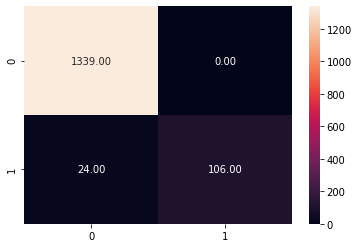

In [166]:
# Finding Confusion Matrix -->
Confusion_Mat = confusion_matrix(y_test, pred_test_X2.reshape(-1,1))
print(Confusion_Mat)

sns.heatmap(Confusion_Mat, annot=True, fmt='.2f')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Accuracy 0.9836623553437712
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1363
           1       0.82      1.00      0.90       106

    accuracy                           0.98      1469
   macro avg       0.91      0.99      0.94      1469
weighted avg       0.99      0.98      0.98      1469

[[1339    0]
 [  24  106]]


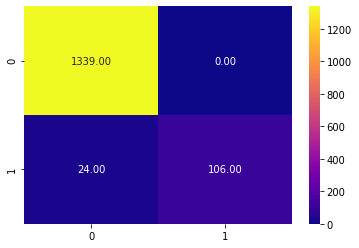

In [167]:
ranFC.fit(X_train_scaled, y_train)
y_pred2 = ranFC.predict(X_test_scaled)
print("Accuracy", accuracy_score(y_pred2, y_test))
print(classification_report(y_pred2, y_test))
Confusion_Mat = confusion_matrix(y_test, y_pred2)
print(Confusion_Mat)
sns.heatmap(Confusion_Mat, annot=True, fmt='.2f', cmap='plasma')

# KNN

In [168]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [169]:
pred_train_X3 = knn.predict(X_train)
pred_test_X3 = knn.predict(X_test)
y_pred3 = knn.predict(X_test)
print("Accuracy : ", accuracy_score(y_pred3, y_test))
print("Accuracy of Training Data : ", accuracy_score(pred_train_X3, y_train))
print("Accuracy of Testing Data : ", accuracy_score(pred_test_X3, y_test))


Accuracy :  0.9414567733151804
Accuracy of Training Data :  0.9538820782253357
Accuracy of Testing Data :  0.9414567733151804


              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1421
           1       0.35      0.96      0.52        48

    accuracy                           0.94      1469
   macro avg       0.68      0.95      0.74      1469
weighted avg       0.98      0.94      0.95      1469

[[1337    2]
 [  84   46]]


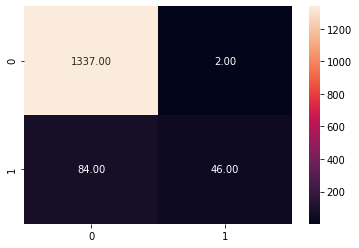

In [170]:
# Finding Confusion Matrix -->
print(classification_report(y_pred3, y_test))
Confusion_Mat = confusion_matrix(y_test, pred_test_X3)
print(Confusion_Mat)

sns.heatmap(Confusion_Mat, annot=True, fmt='.2f')

Accuracy 0.9591558883594282
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1389
           1       0.58      0.94      0.71        80

    accuracy                           0.96      1469
   macro avg       0.79      0.95      0.85      1469
weighted avg       0.97      0.96      0.96      1469

[[1334    5]
 [  55   75]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


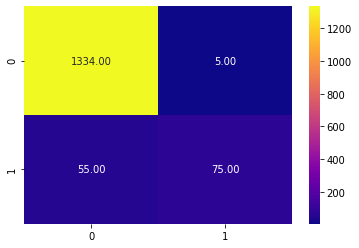

In [171]:
#Training and Testing on Scaled Data
knn.fit(X_train_scaled, y_train)
y_pred3 = knn.predict(X_test_scaled)
print("Accuracy", accuracy_score(y_pred3, y_test))
print(classification_report(y_pred3, y_test))
Confusion_Mat = confusion_matrix(y_test, y_pred3)
print(Confusion_Mat)

sns.heatmap(Confusion_Mat, annot=True, fmt='.2f', cmap='plasma')

# Naive Bayes

In [172]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [173]:
pred_train_X4 = GNB.predict(X_train)
pred_test_X4 = GNB.predict(X_test)
print("Accuracy of Training Data : ", accuracy_score(pred_train_X4, y_train))
print("Accuracy of Testing Data : ", accuracy_score(pred_test_X4, y_test))

Accuracy of Training Data :  0.9226503210741389
Accuracy of Testing Data :  0.9319264805990469


[[1302   37]
 [  63   67]]


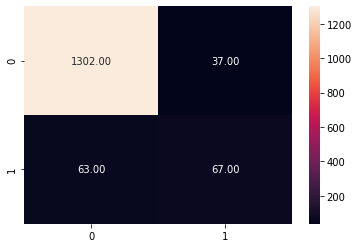

In [174]:
# Finding Confusion Matrix -->
Confusion_Mat = confusion_matrix(y_test, pred_test_X4)
print(Confusion_Mat)

sns.heatmap(Confusion_Mat, annot=True, fmt='.2f')

Accuracy 0.9292035398230089
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1365
           1       0.50      0.62      0.56       104

    accuracy                           0.93      1469
   macro avg       0.74      0.79      0.76      1469
weighted avg       0.94      0.93      0.93      1469

[[1300   39]
 [  65   65]]


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


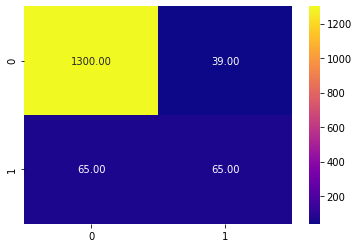

In [175]:
GNB.fit(X_train_scaled, y_train)
y_pred4 = GNB.predict(X_test_scaled)
print("Accuracy", accuracy_score(y_pred4, y_test))
print(classification_report(y_pred4, y_test))
Confusion_Mat = confusion_matrix(y_test, y_pred4)
print(Confusion_Mat)

sns.heatmap(Confusion_Mat, annot=True, fmt='.2f', cmap='plasma')

# Support Vector Machines

In [176]:
SVM = SVC(probability=True, C=3, random_state=0)
SVM.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [177]:
pred_train_X5 = SVM.predict(X_train)
pred_test_X5 = SVM.predict(X_test)
y_pred5 = SVM.predict(X_test)
print("Accuracy of Training Data : ", accuracy_score(pred_train_X5, y_train))
print("Accuracy of Testing Data : ", accuracy_score(pred_test_X5, y_test))
print(classification_report(y_pred5, y_test))

Accuracy of Training Data :  0.9115586690017513
Accuracy of Testing Data :  0.911504424778761
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1469
           1       0.00      0.00      0.00         0

    accuracy                           0.91      1469
   macro avg       0.50      0.46      0.48      1469
weighted avg       1.00      0.91      0.95      1469



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[1339    0]
 [ 130    0]]


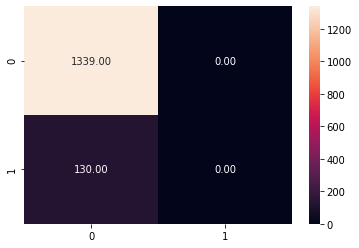

In [178]:
# Finding Confusion Matrix -->
Confusion_Mat = confusion_matrix(y_test, pred_test_X5)
print(Confusion_Mat)

sns.heatmap(Confusion_Mat, annot=True, fmt='.2f')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.9775357385976855
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1358
           1       0.80      0.94      0.86       111

    accuracy                           0.98      1469
   macro avg       0.90      0.96      0.93      1469
weighted avg       0.98      0.98      0.98      1469

[[1332    7]
 [  26  104]]


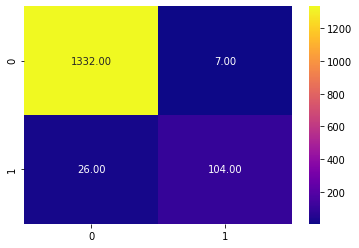

In [179]:
SVM.fit(X_train_scaled, y_train)
y_pred5 = SVM.predict(X_test_scaled)
print("Accuracy", accuracy_score(y_pred5, y_test))
print(classification_report(y_pred5, y_test))
Confusion_Mat = confusion_matrix(y_test, y_pred5)
print(Confusion_Mat)

sns.heatmap(Confusion_Mat, annot=True, fmt='.2f', cmap='plasma')

# Models Comparison

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Log Reg: 0.950157 
KNN: 0.943826 
DTC: 0.980796 
GNB: 0.923800 
ranFC: 0.987132 
SVM: 0.911550 


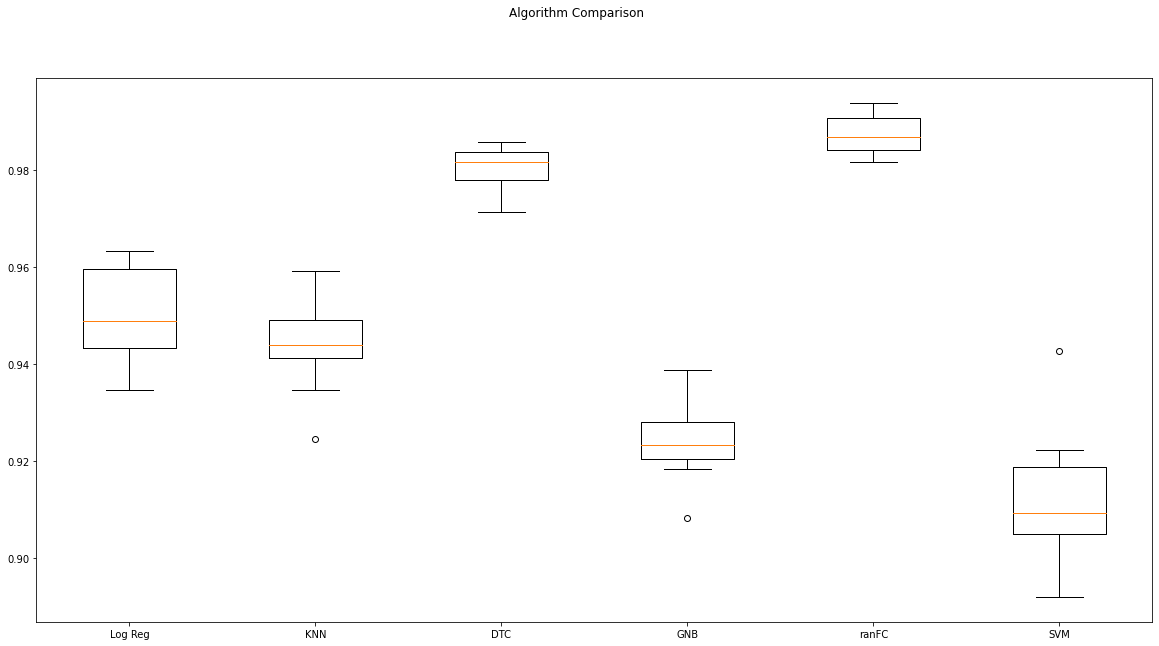

In [180]:
from sklearn import model_selection
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

models = []
models.append(('Log Reg', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('ranFC', RandomForestClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f " % (name, cv_results.mean())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize=(20,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 9. Give a business understanding of your model

In [181]:
print("**********Logistic Regression**********")
print("Precision : ", precision_score(y_pred, y_test))
print("Recall : ", recall_score(y_pred, y_test))
print("f1 Score : ", f1_score(y_pred, y_test))
print("Accuracy : ", accuracy_score(y_pred, y_test))
print()

print("**********Support Vector Machines**********")
print("Precision : ", precision_score(y_pred5, y_test))
print("Recall : ", recall_score(y_pred5, y_test))
print("f1 Score : ", f1_score(y_pred5, y_test))
print("Accuracy : ", accuracy_score(y_pred5, y_test))
print()

print("**********Naive Bayes**********")
print("Precision : ", precision_score(y_pred4, y_test))
print("Recall : ", recall_score(y_pred4, y_test))
print("f1 Score : ", f1_score(y_pred4, y_test))
print("Accuracy : ", accuracy_score(y_pred4, y_test))
print()

print("**********KNN**********")
print("Precision : ", precision_score(y_pred3, y_test))
print("Recall : ", recall_score(y_pred3, y_test))
print("f1 Score : ", f1_score(y_pred3, y_test))
print("Accuracy : ", accuracy_score(y_pred3, y_test))
print()

print("**********Random Forest**********")
print("Precision : ", precision_score(y_pred2, y_test))
print("Recall : ", recall_score(y_pred2, y_test))
print("f1 Score : ", f1_score(y_pred2, y_test))
print("Accuracy : ", accuracy_score(y_pred2, y_test))
print()

print("**********Decision Tree**********")
print("Precision : ", precision_score(y_pred1, y_test))
print("Recall : ", recall_score(y_pred1, y_test))
print("f1 Score : ", f1_score(y_pred1, y_test))
print("Accuracy : ", accuracy_score(y_pred1, y_test))
print()

**********Logistic Regression**********
Precision :  0.6692307692307692
Recall :  0.7909090909090909
f1 Score :  0.725
Accuracy :  0.955071477195371

**********Support Vector Machines**********
Precision :  0.8
Recall :  0.9369369369369369
f1 Score :  0.8630705394190872
Accuracy :  0.9775357385976855

**********Naive Bayes**********
Precision :  0.5
Recall :  0.625
f1 Score :  0.5555555555555556
Accuracy :  0.9292035398230089

**********KNN**********
Precision :  0.5769230769230769
Recall :  0.9375
f1 Score :  0.7142857142857143
Accuracy :  0.9591558883594282

**********Random Forest**********
Precision :  0.8153846153846154
Recall :  1.0
f1 Score :  0.8983050847457628
Accuracy :  0.9836623553437712

**********Decision Tree**********
Precision :  0.9076923076923077
Recall :  0.944
f1 Score :  0.9254901960784314
Accuracy :  0.9870660313138189



# Details got from Univariate Analysis -->

The data set got 0 missing cells.

It got 7 numeric variables: ‘Age’, ‘CC_Avg’, ‘ID’, ‘Income’, ‘Mortgage’, 
‘Zip_Code’, ‘Experience’

It got 2 categorical variables: ‘Education’, ‘Family’

It got 5 Boolean variables: ‘CD_Account’, ‘Credit_Card’, ‘Online’, 
‘Personal_Loan’, ‘Securities Account’

Personal Loan is highly correlated with Income, average spending on Credit cards, mortgage & if the customer has a certificate of deposit (CD) account with the bank.

Also, Experience is highly correlated with Age (ρ = 0.994214857)
Categorical

42% of the candidates are graduated, while 30% are professional and 28% are Undergraduate.

Around 29% of the customer’s family size is 1.
Boolean

94% of the customer doesn’t have a certificate of deposit (CD) account with the bank.

Around 71% of the customer doesn’t use a credit card issued by bank.

Around 60% of customers use internet banking facilities.

Around 90% of the customer doesn’t accept the personal loan offered in the last campaign.

Around 90% of the customer doesn’t have a securities account with the bank.

The mean age of the customers is 45 with standard deviation of 11.5. Also, we had estimated the average age in hypothesis testing between 30–50. The curve is slightly negatively skewed (Skewness = -0.02934068151) hence the curve is fairly symmetrical

The mean of Avg. spending on credit cards per month is 1.93 with standard deviation of 1.75. The curve is highly positive skewed (Skewness = 1.598443337)
The mean annual income of the customer is 73.77 with standard deviation of 46. The curve is moderately positive skewed (Skewness = 0.8413386073)

The mean value of house mortgage is 56.5 with standard deviation of 101.71. The curve is highly positive skewed (Skewness = 2.104002319) and there are a lot of outlier’s present (Kurtosis = 4.756796669)

Also, no need for ‘ID’ and ‘Experience’ columns for further analysis since ‘ID’ is just numbers of series & ‘Experience’ is highly correlated with ‘Age’.

#Bivariate Analysis

1. The customer is a graduate or under-graduate can affect the buying probability, people who are graduated or Advanced Professionals are more viable to buy personal loans from a bank rather than people who are under-graduated.

2. The number of family members not affect probability.

3. The customer who has a certificate of deposit (CD) account with the bank seems to buy personal loans from the bank.

4. The customer who uses or doesn’t use a credit card issued by bank doesn’t seem to affect the probability of buying a personal loan.

5. The customer who uses or doesn’t use internet banking facilities seems to not affect the probability of buying personal loans.

6. The customers who have or don’t have securities account with the bank do not affect the probability of buying a personal loan.

7. Age does not affect the chances of buying the personal loan

8. It can be clearly seen that the customers with high incomes are more feasible to buy the personal loan

# Outliers in dataset

Income, Average Spend on Credit Card and Mortgage are having certain outliers. Having outliers often has a significant effect on the mean and standard deviation and, hence affecting the distribution. To remove outliers from dataset I use Power Transformation and for Mortgage binning was used. 

# Conclusion
The aim of the bank is to convert there liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data. Six classification algorithms were used in this study. From the above details, it seems like Decision Tree algorithm and Random Forest Classifier have the highest accuracy and f1 score, so we can choose that as our final model